In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import random as rd

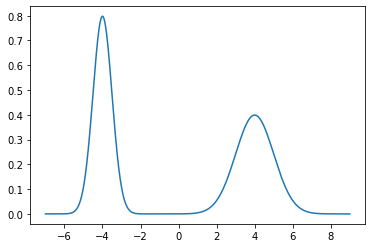

In [3]:
x_axis = np.linspace(-7, 9, 1000)
given_dist = sts.norm.pdf(x_axis, -4, 0.5) + sts.norm.pdf(x_axis, 4, 1)

plt.plot(x_axis, given_dist)

In [16]:
ep = 0.5
trials = 1000
#Monte Carlo 
lst_of_samples = []
count_accepted = 0
#we start from 0
lst_of_samples.append(0)
for i in range(trials-1):
    proposed_sample = sts.norm(lst_of_samples[-1], ep).rvs()
    #the probability of acceptance
    a = min(1, (sts.norm.pdf(proposed_sample, -4, 0.5) + sts.norm.pdf(proposed_sample, 4, 1))/(sts.norm.pdf(
        lst_of_samples[-1], -4, 0.5) + sts.norm.pdf(lst_of_samples[-1], 4, 1)) * 
            sts.norm.pdf(lst_of_samples[-1], proposed_sample, ep)/sts.norm.pdf(proposed_sample,lst_of_samples[-1],ep))
    #accept or reject
    if rd.random() < a: #accept
        lst_of_samples.append(proposed_sample)
        count_accepted +=1
    else:
        lst_of_samples.append(lst_of_samples[-1])
        

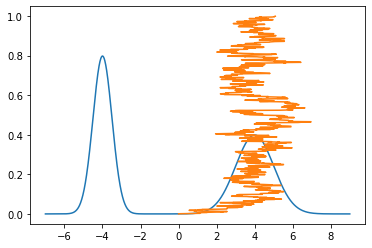

In [21]:
plt.figure()
plt.plot(x_axis, given_dist)
y_samples = np.arange(trials)/trials #create the line of sampling
plt.plot(lst_of_samples, y_samples)